In [79]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

In [80]:
df = pd.read_csv('insurance.xls')

In [81]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [82]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [83]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [84]:
# print whose age is greater than 30
print(df[df['age'] > 30])

      age     sex     bmi  children smoker     region      charges
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
6      46  female  33.440         1     no  southeast   8240.58960
7      37  female  27.740         3     no  northwest   7281.50560
...   ...     ...     ...       ...    ...        ...          ...
1329   52    male  38.600         2     no  southwest  10325.20600
1330   57  female  25.740         2     no  southeast  12629.16560
1332   52  female  44.700         3     no  southwest  11411.68500
1333   50    male  30.970         3     no  northwest  10600.54830
1337   61  female  29.070         0    yes  northwest  29141.36030

[894 rows x 7 columns]


In [85]:
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [86]:

df.shape

(1338, 7)

In [87]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [88]:
#change the value of smoker to 1 if it is yes and 0 if it is no using map function
df['smoker_encoded'] = df['smoker'].map({'yes': 1, 'no': 0})

In [89]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [90]:
df.isnull().any()

age               False
sex               False
bmi               False
children          False
smoker            False
region            False
charges           False
smoker_encoded    False
dtype: bool

In [91]:
#is there any duplicate rows in the dataset
df.duplicated().any()
#find in which column the duplicate values are present


np.True_

In [92]:
df.duplicated().sum()
#drop the duplicate values
df.drop_duplicates(inplace=True)

In [93]:
df.duplicated().any()

np.False_

In [94]:
df['sex']=df['sex'].map({'male':0,'female':1})
#.map() use garera male lai 0 rw female lai 1 banako ho hai yesma chai

In [95]:
df['region']=df['region'].map({'southeast':0,'southwest':1,'northwest':2,'northeast':3})
df

,age,sex,bmi,children,smoker,region,charges,smoker_encoded
0,19,1,27.900,0,yes,1,16884.92400,1
1,18,0,33.770,1,no,0,1725.55230,0
2,28,0,33.000,3,no,0,4449.46200,0
3,33,0,22.705,0,no,2,21984.47061,0
4,32,0,28.880,0,no,2,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,2,10600.54830,0
1334,18,1,31.920,0,no,3,2205.98080,0
1335,18,1,36.850,0,no,0,1629.83350,0
1336,21,1,25.800,0,no,1,2007.94500,0


In [96]:
df = df.drop('smoker',axis=1)

In [97]:
x=df.drop('charges',axis=1)
x


,age,sex,bmi,children,region,smoker_encoded
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,0
2,28,0,33.000,3,0,0
3,33,0,22.705,0,2,0
4,32,0,28.880,0,2,0
...,...,...,...,...,...,...
1333,50,0,30.970,3,2,0
1334,18,1,31.920,0,3,0
1335,18,1,36.850,0,0,0
1336,21,1,25.800,0,1,0


In [98]:
y=df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [99]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#random_state rakhney na bhney data ma uniformity hudaina 
#data haru X_train rw Y-train ma exchange bhai rakxa hai tw 
#y ma actual contionous model bhye paxi hamlae regression model use garxam 

In [100]:
model = LinearRegression()

In [101]:
model.fit( X_train, Y_train)

LinearRegression()

In [102]:
pred1=model.predict(X_test)
df1=pd.DataFrame({'Actual':Y_test,'linear':pred1})
df1

,Actual,linear
900,8688.85885,8078.883432
1064,5708.86700,5777.020824
1256,11436.73815,14429.162942
298,38746.35510,31815.196130
237,4463.20510,8917.201233
...,...,...
534,13831.11520,16709.281918
542,13887.20400,15227.112864
760,3925.75820,6402.296010
1284,47403.88000,38527.338012


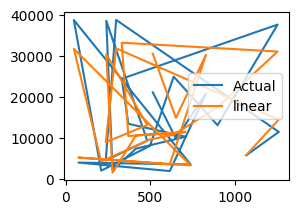

In [103]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[1:24],label='Actual')
plt.plot(df1['linear'].iloc[1:24],label='linear')
plt.legend()
plt.show()

In [104]:
#evalauate the model
score1=metrics.r2_score(Y_test,pred1)
score1

0.8068900372589178

In [105]:
# mathi hamlae 80% accuracy payem (Linear Regression use garera)
#yo tesst ko data ko lagi matra bhayo aba hamlae actual data ko lagi pani accuracy check garney hai tw

In [106]:
pred2 = model.predict(X_train)


In [107]:
score2 = metrics.r2_score(Y_train,pred2)
score2

0.7298855808333018

In [108]:
#now we have to check the new data 
#aba new data kasri check garney tw 

In [109]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'region', 'charges', 'smoker_encoded'], dtype='object')

In [110]:
new_df = pd.DataFrame({'age': [20,30], 'sex': [0,1], 'bmi': [25.7,27.0], 'children': [3,2], 'region': [3,4], 'smoker_encoded': [1,0]})
new_df

,age,sex,bmi,children,region,smoker_encoded
0,20,0,25.7,3,3,1
1,30,1,27.0,2,4,0


In [111]:
pred_user = model.predict(new_df)

In [112]:
pred_user

array([26586.03267569,  6242.4148054 ])

In [113]:
print('The predicted charges for the new data is:',pred_user)

The predicted charges for the new data is: [26586.03267569  6242.4148054 ]


In [114]:

pred1

array([ 8078.88343163,  5777.02082362, 14429.1629418 , 31815.19613046,
        8917.2012333 , 13102.2532531 , 30406.91630632,  1496.00939292,
       10585.68162384, 11371.11817014, 10425.02552886, 33182.38334399,
       31034.12642525, 17470.15608802, 10751.55155272,  9571.6429809 ,
        4210.73770511, 31694.45971304,  3258.92889458,  5177.98753414,
        3502.67751614, 30235.01833548, 14856.9258212 , 30511.2886458 ,
       31181.52812095,  5572.48830411, 35470.05253875, 36628.29944762,
       11355.00686787, 14149.90001402,  6447.62469719, 12677.59872625,
         342.27031517, 12129.74757042, 39633.65931297, 12388.44090092,
        4786.8037088 ,  3965.01041568, 30809.56216292,  8903.94154501,
        7008.17946853, 30055.36632807, 34741.77871131, 12235.04161824,
        7402.95322862,  3464.26266068,  6167.49184652,  9028.9121507 ,
        4317.56629324,  8968.37021414,  6551.99747307, 12035.29853403,
       31193.38920692,  3506.07052596, 11096.75539915,  9681.60123861,
      

In [115]:
pred2

array([ 2265.19813516,  3227.98233072, 14509.55270825, ...,
         694.60654925,  8245.20854812,  9203.10255059], shape=(1069,))

In [116]:
#Linear Regression use garem aba aru p
# ani heram hai tw